In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
print("Dataset shape:", df.shape)
print("Survival distribution:\n", df['Survived'].value_counts())
print("\nSample data:\n", df.head())

df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).copy()
df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median())
df_processed['Fare'] = df_processed['Fare'].fillna(df_processed['Fare'].median())
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])
label_encoders = {}
cat_cols = ['Sex', 'Embarked']
for col in cat_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset shape: (891, 12)
Survival distribution:
 Survived
0    549
1    342
Name: count, dtype: int64

Sample data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN   

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y)
models = {'KNN': KNeighborsClassifier(n_neighbors=5), 'Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)}


In [13]:
results = {}
preds_dict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    preds_dict[name] = y_pred
    print(f"\n{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred,
          target_names=['Not Survived', 'Survived']))


KNN: 0.8156
              precision    recall  f1-score   support

Not Survived       0.83      0.88      0.85       110
    Survived       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Naive Bayes: 0.7821
              precision    recall  f1-score   support

Not Survived       0.81      0.84      0.83       110
    Survived       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Decision Tree: 0.8045
              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       110
    Survived       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg     

In [8]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print("MODEL COMPARISON TABLE")
print()
print(results_df.to_string(index=False, float_format='%.4f'))

MODEL COMPARISON TABLE

        Model  Accuracy
          KNN    0.8156
Decision Tree    0.8045
  Naive Bayes    0.7821


In [9]:
dt_model = models['Decision Tree']
feat_importance = pd.DataFrame({'Feature': X.columns,'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False)
print("\nTOP IMPORTANT FEATURES (Decision Tree)")
print(feat_importance.head(10).to_string(index=False))



TOP IMPORTANT FEATURES (Decision Tree)
 Feature  Importance
     Sex    0.379253
     Age    0.232118
    Fare    0.198001
  Pclass    0.128932
Embarked    0.026721
   Parch    0.021805
   SibSp    0.013171


In [10]:
best_model_name = results_df.iloc[0]['Model']
best_preds = preds_dict[best_model_name]
cm = confusion_matrix(y_test, best_preds)
print(f"\nCONFUSION MATRIX – {best_model_name} (Accuracy: {results[best_model_name]:.4f})")
print(cm)


CONFUSION MATRIX – KNN (Accuracy: 0.8156)
[[97 13]
 [20 49]]


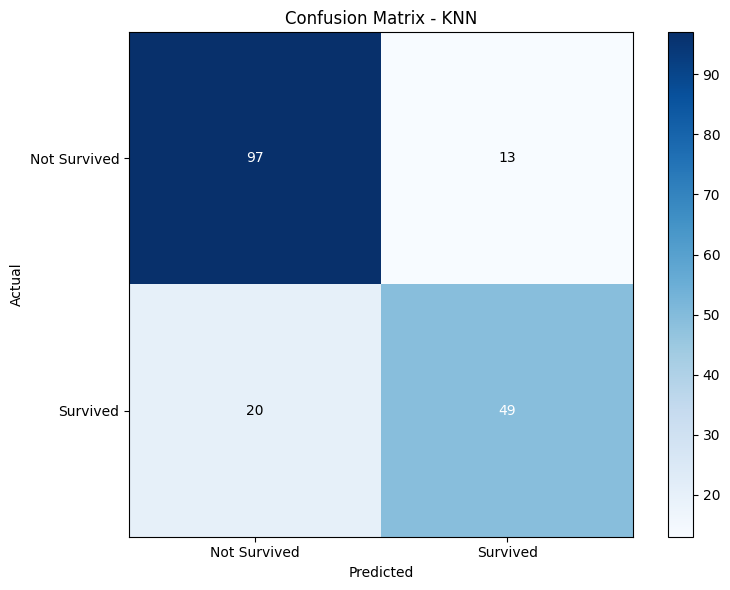

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()
